In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import warnings
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
# matplotlib inline
# Reading the train.csv by removing the
# last column since it's an empty column
warnings.filterwarnings("ignore")
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'Fungal infection'),
  Text(1, 0, 'Hepatitis C'),
  Text(2, 0, 'Hepatitis E'),
  Text(3, 0, 'Alcoholic hepatitis'),
  Text(4, 0, 'Tuberculosis'),
  Text(5, 0, 'Common Cold'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Dimorphic hemmorhoids(piles)'),
  Text(8, 0, 'Heart attack'),
  Text(9, 0, 'Varicose veins'),
  Text(10, 0, 'Hypothyroidism'),
  Text(11, 0, 'Hyperthyroidism'),
  Text(12, 0, 'Hypoglycemia'),
  Text(13, 0, 'Osteoarthristis'),
  Text(14, 0, 'Arthritis'),
  Text(15, 0, '(vertigo) Paroymsal  Positional Vertigo'),
  Text(16, 0, 'Acne'),
  Text(17, 0, 'Urinary tract infection'),
  Text(18, 0, 'Psoriasis'),
  Text(19, 0, 'Hepatitis D'),
  Text(20, 0, 'Hepatitis B'),
  Text(21, 0, 'Allergy'),
  Text(22, 0, 'hepatitis A'),
  Text(23, 0,

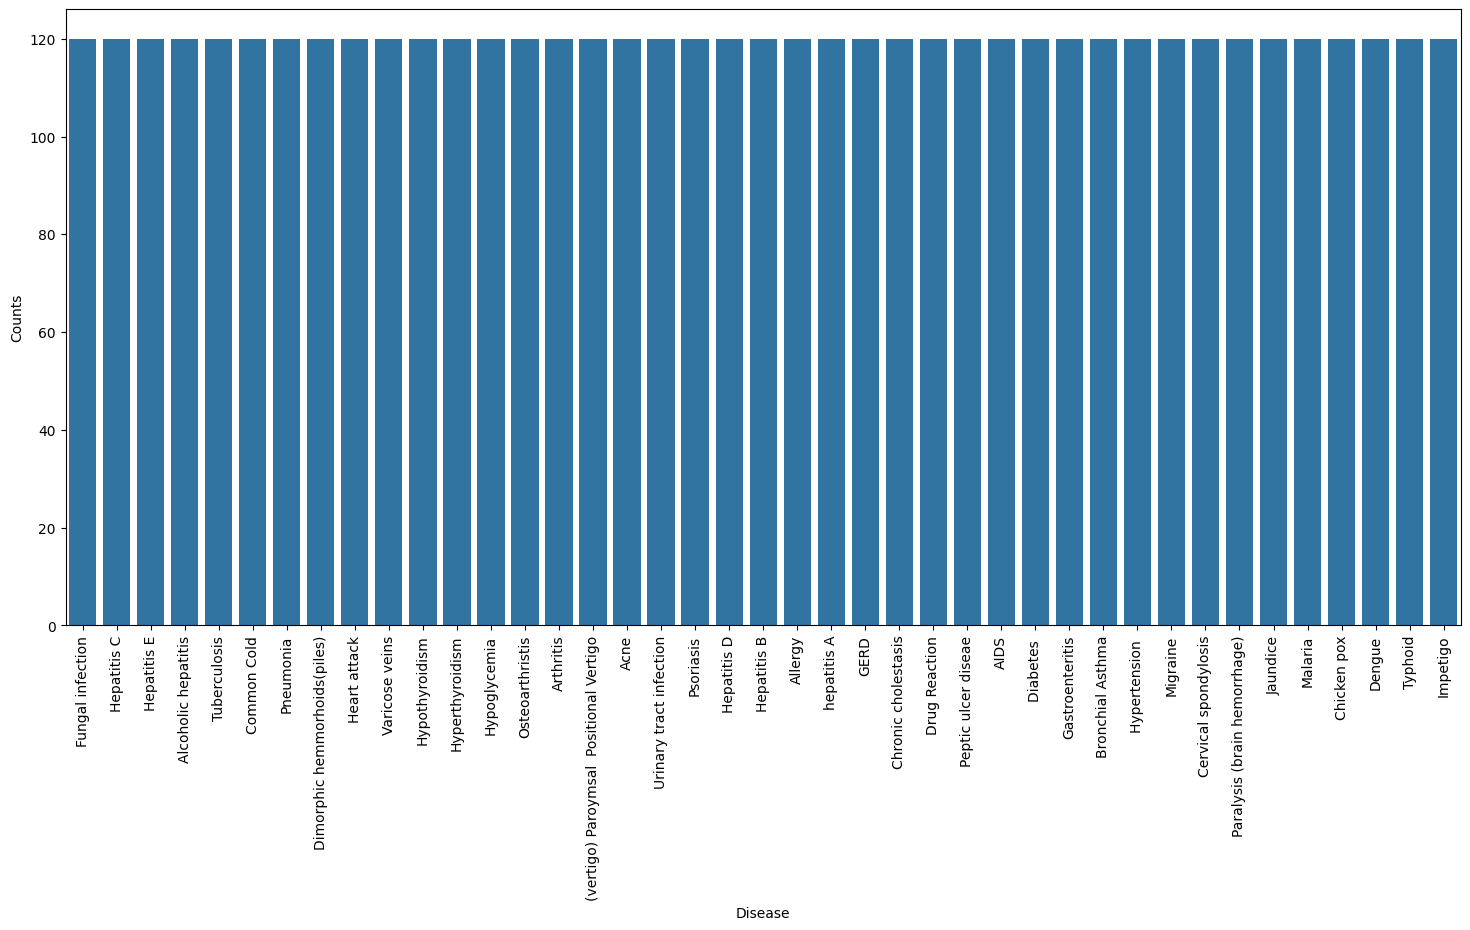

In [3]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)

In [4]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.4, random_state = 24)
 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       0.94      1.00      0.97        47
           2       0.74      0.18      0.29       171
           3       1.00      0.91      0.95        43
           4       0.64      1.00      0.78        34
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        43
           8       1.00      1.00      1.00        55
           9       0.91      0.31      0.46       136
          10       1.00      1.00      1.00        43
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        49
          13       1.00      1.00      1.00        53
          14       1.00      0.33      0.50       123
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00        47
          17       1.00    

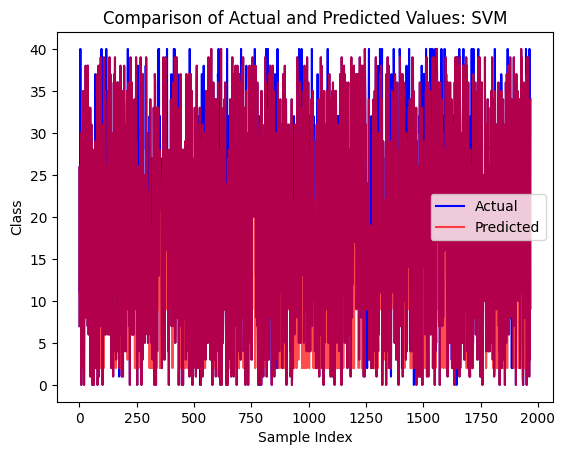

In [5]:
 

# Training and testing SVM Classifier
svm_model = SVC(C=0.30,kernel='sigmoid',gamma='auto')
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
print(classification_report(preds,y_test))


plt.plot(range(len(y_test)), y_test, label='Actual', color='b')
plt.plot(range(len(preds)), preds, label='Predicted', color='r', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Values: SVM')
plt.legend()
plt.show()


 

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        64
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        53
           5       0.89      1.00      0.94        49
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        43
           8       1.00      1.00      1.00        55
           9       1.00      1.00      1.00        46
          10       1.00      1.00      1.00        43
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        49
          13       1.00      1.00      1.00        53
          14       1.00      1.00      1.00        41
          15       1.00      1.00      1.00        54
          16       1.00      1.00      1.00        47
          17       1.00    

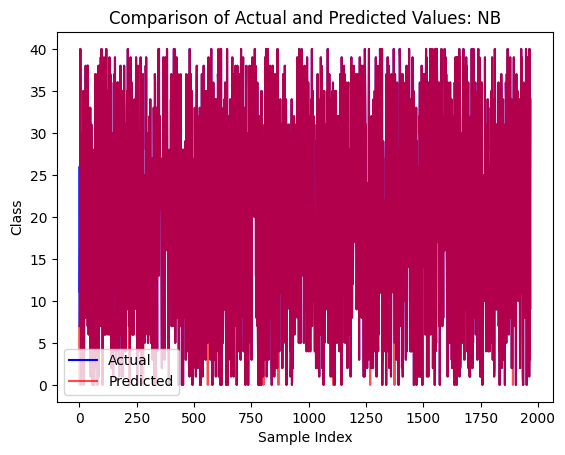

In [6]:
#Naive Bayes classifier
nb_model = CategoricalNB(alpha=0,force_alpha=True)
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(classification_report(preds,y_test))
plt.plot(range(len(y_test)), y_test, label='Actual', color='b')
plt.plot(range(len(preds)), preds, label='Predicted', color='r', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Values: NB')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.90      1.00      0.95        45
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        39
           4       0.00      0.00      0.00         0
           5       0.95      1.00      0.97        52
           6       0.92      1.00      0.96        45
           7       1.00      1.00      1.00        43
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00        43
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        49
          13       0.96      1.00      0.98        51
          14       0.95      1.00      0.97        39
          15       0.00      0.00      0.00         0
          16       0.91      0.86      0.89        50
          17       1.00    

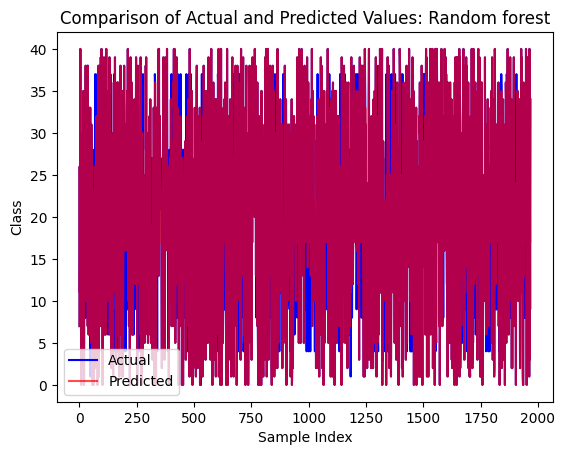

In [7]:
#random forest

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18, n_estimators=10,criterion='gini',max_features='log2',min_samples_split=50,ccp_alpha=0.025)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(classification_report(preds,y_test))

plt.plot(range(len(y_test)), y_test, label='Actual', color='b')
plt.plot(range(len(preds)), preds, label='Predicted', color='r', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Values: Random forest')
plt.legend()
plt.show()

In [8]:
# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
 
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

In [ ]:
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = svm_model.predict(test_X)
nb_preds =nb_model.predict(test_X)
rf_preds = rf_model.predict(test_X)
 
final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]

print(classification_report(test_Y,final_preds))
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
symptoms = X.columns.values

IndexError: invalid index to scalar variable.

NameError: name 'final_preds' is not defined

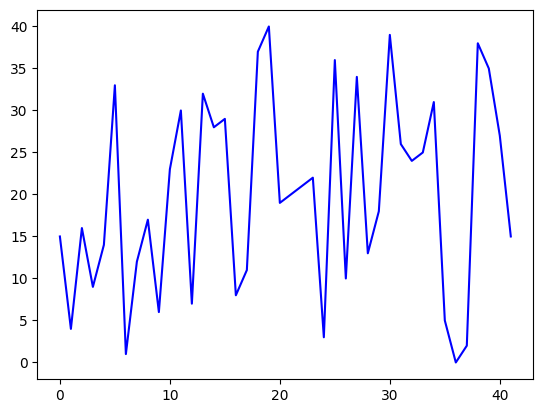

In [11]:
plt.plot(range(len(test_Y )), test_Y, label='Actual', color='b')
plt.plot(range(len(final_preds)), final_preds, label='Predicted', color='y', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Values: Final Model')
plt.legend()
plt.show()

In [33]:
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
 
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

In [34]:
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    try:
        symptoms = symptoms.split(",")

        # creating input data for the models
        input_data = [0] * len(data_dict["symptom_index"])
        for symptom in symptoms:
            index  = data_dict["symptom_index"][symptom]
            input_data[index] = 1

        # reshaping the input data and converting it
        # into suitable format for model predictions
        input_data = np.array(input_data).reshape(1,-1)

        # generating individual outputs
        rf_prediction = data_dict["predictions_classes"][rf_model.predict(input_data)[0]]
        nb_prediction = data_dict["predictions_classes"][nb_model.predict(input_data)[0]]
        svm_prediction = data_dict["predictions_classes"][svm_model.predict(input_data)[0]]

        # making final prediction by taking mode of all predictions
        final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
        print(f'final prediction: ' ,final_prediction)
    except KeyError as ke:
        print(f'Unknown Symptom: {ke}')

In [35]:
# Testing the function 

sym1 =input("Enter the 1st symptom: ")
sym2 =input("Enter the 2nd symptom: ")
sym3 =input("Enter the 3rd symptom: ")
sym_fin = sym1 +"," + sym2+","+sym3
predictDisease(sym_fin)

Enter the 1st symptom: Vomiting
Enter the 2nd symptom: Itching
Enter the 3rd symptom: Anxiety
final prediction:  (vertigo) Paroymsal  Positional Vertigo


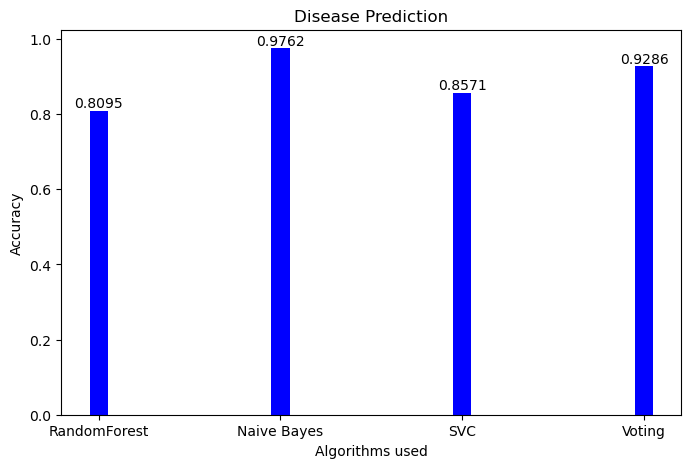

In [36]:
accuracy_rfc     = accuracy_score(test_Y, rf_preds)
accuracy_naive   = accuracy_score(test_Y, nb_preds)
accuracy_svc     = accuracy_score(test_Y, svm_preds)
accuracy_vote   = accuracy_score(test_Y, final_preds)

data = {
    'RandomForest': accuracy_rfc,
    'Naive Bayes': accuracy_naive,
    'SVC': accuracy_svc,
    'Voting': accuracy_vote
}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(8, 5))

# creating the bar plot
bars = plt.bar(courses, values, color='blue', width=0.1)

# adding annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 4), ha='center', va='bottom')

plt.xlabel("Algorithms used")
plt.ylabel("Accuracy")
plt.title("Disease Prediction")
plt.show()